# 第5章 数据挖掘——海底捞针

在这一章里，我们将探讨以下主题：
- 使用距离度量
- 学习和使用核方法
- 用 k-means 进行数据聚类
- 学习向量量化
- 在单变量数据中找出异常点
- 使用局部异常因子方法发现异常点

## 5.1 简介

## 5.2 使用距离度量

#### 5.2.1 准备工作

#### 5.2.2 操作方法

In [1]:
import numpy as np

def euclidean_distance(x,y):
    if len(x) == len(y):
        return np.sqrt(np.sum(np.power((x-y),2)))
    else:
        print("Input should be of equal length")
    return None

def lrNorm_distance(x,y,power):
    if len(x) == len(y):
        return np.power(np.sum(np.power(np.abs(x-y),power)),(1/(1.0*power)))
    else:
        print("Input should be of equal length")
    return None

def cosine_distance(x,y):
    if len(x) == len(y):
        return np.dot(x,y) / np.sqrt(np.dot(x,x) * np.dot(y,y))
    else:
        print("Input should be of equal length")
    return None

def jaccard_distance(x,y):
    set_x = set(x)
    set_y = set(y)
    return 1 - len(set_x.intersection(set_y)) / len(set_x.union(set_y))
                   
def hamming_distance(x,y):
    diff = 0
    if len(x) == len(x):
        for char1,char2 in zip(x,y):
            if char1 != char2:
                diff += 1
        return diff
    else:
        print("Input should be of equal length")
    return None

In [2]:
# 样例数据，两个三维的向量
x = np.asarray([1,2,3])
y = np.asarray([1,2,3])

# 打印输出欧式距离
print(euclidean_distance(x,y))

# r值为2，调用lr_norm距离函数打印欧式空间距离
print(lrNorm_distance(x,y,2))

# 曼哈顿或者城市街区距离
print(lrNorm_distance(x,y,1))

# 计算预先距离的样例数据
x = [1,1]
y = [1,0]
print("Cosine distance:", cosine_distance(x,y))

# 计算Jaccard距离的样例数据
x = [1,2,3]
y = [1,2,3]
print("Jaccard distance:", jaccard_distance(x,y))

# 计算Hamming距离的样例数据
x = [11001]
y = [11011]
print("Hamming distance:", hamming_distance(x,y))

0.0
0.0
0.0
Cosine distance: 0.707106781187
Jaccard distance: 0.0
Hamming distance: 1


#### 5.2.3 工作原理

#### 5.2.4 更多内容

#### 5.2.5 参考资料

## 5.3 学习和使用核方法

## 5.4 用k-means进行数据聚类

#### 5.4.1 准备工作

#### 5.4.2 操作方法

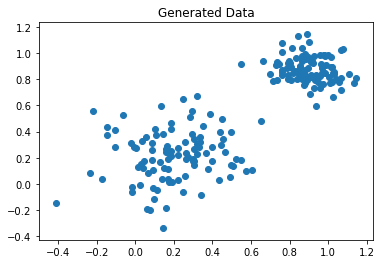

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def get_random_data():
    x_1 = np.random.normal(loc=0.2,scale=0.2,size=(100,100))
    x_2 = np.random.normal(loc=0.9,scale=0.1,size=(100,100))
    x = np.r_[x_1,x_2]
    return x

x = get_random_data()

plt.cla()
plt.figure(1)
plt.title("Generated Data")
plt.scatter(x[:,0],x[:,1])
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 2 0 2 0 2 2 2 0 2 0 2 2 2 2 2 0 0 2 0 2 2 2 0 2 0 0 0 0 2
 0 0 2 0 2 0 0 2 0 0 2 2 2 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 2 2 0 0 0 2 2 2 2
 2 0 0 2 2 0 0 2 2 2 2 0 2 2 2 0 2 0 2 2 0 2 0 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[3 3 1 0 3 1 1 0 3 0 1 0 1 1 1 1 3 0 1 0 0 0 0 1 3 1 1 3 0 3 1 3 0 1 1 1 1
 0 3 1 3 1 1 1 1 1 3 1 0 3 0 0 1 1 3 3 1 0 3 0 3 1 0 0 3 1 1 0 0 3 0 3 0 3
 3 1 0 1 1 3 1 1 3 3 1 1 3 1 1 1 1 3

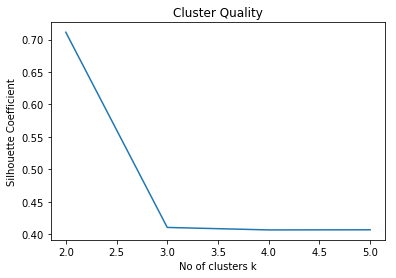

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def form_clusters(x,k):
    """
    Build clusters
    """
    # k是划分出的簇的个数
    no_clusters = k
    model = KMeans(n_clusters=no_clusters,init='random')
    model.fit(x)
    labels = model.labels_
    print(labels)
    # 计算轮廓系数
    sh_score = silhouette_score(x,labels)
    return sh_score

sh_scores = []
for i in range(1,5):
    sh_score = form_clusters(x,i+1)
    sh_scores.append(sh_score)

no_clusters = [i+1 for i in range(1,5)]

plt.figure(2)
plt.plot(no_clusters,sh_scores)
plt.title("Cluster Quality")
plt.xlabel("No of clusters k")
plt.ylabel("Silhouette Coefficient")
plt.show()

#### 5.4.3 工作原理